# Survivalibility on Mt. Everest

## Programming for Data Analysis Project 1

## Author: David Higgins - G00411302

"Getting to the top is optional. Getting down is mandatory."

\- Ed Viesturs

This notebook will generate a synthetic dataset aiming to represent the survivability of climbers who reach the summit of Mt. Everest. Death from accidents, exposure, cerebral and pulmonary edema are very real risks on the descent from the summit. Studies have shown that the descent is more dangerous part of any climb, particularly when attempting one of the 14 mountains in the world over 8000m. Using a dataset of summitters generated by Roshan Pandey on Kaggle to get an understanding of historical rates of death, oxygen use and the spread of climbs over different seasons, I will generate a synthetic dataset containing the age, oxygen use, season climbed and death or survival of climbers for a single year. The number of summitters in that dataset will be decided by a linear regression model. Historical data from Pandey's dataset to be used to train the model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sklearn.linear_model as sk
import scipy.stats as ss

%matplotlib inline

plt.rcParams['figure.figsize'] = 14, 10

We first import the Mt. Everest Ascent dataset to understand what information is available for mountaineers and to get an idea of the shape of that data.

In [2]:
df = pd.read_csv("Mt_Everest_Ascent_Data.csv")
df.head()

,Peak,Name,Year,Season,Date,Time,Citizenship,Sex,Age,Oxy,Dth,Host
0,EVER,Edmund Percival Hillary,1953,Spr,29-May,11:30,New Zealand,M,33,Y,.,Nepal
1,EVER,Tenzing Norgay,1953,Spr,29-May,11:30,India,M,39,Y,.,Nepal
2,EVER,Hans-Rudolf Von Gunten,1956,Spr,24-May,11:00,Switzerland,M,27,Y,.,Nepal
3,EVER,Juerg P. Marmet,1956,Spr,23-May,14:00,Switzerland,M,28,Y,.,Nepal
4,EVER,Ernst Schmied,1956,Spr,23-May,14:00,Switzerland,M,31,Y,.,Nepal


The predominant type of expedition on Everest at present is a commercial expedition. This is an expedition that is run for profit by a guiding company and takes on a group of clients who pay a very substantial fee, up to $100000, for a place on the expediton. This type of expedition only began on Everest in 1985 but still accounts for the vast majority of summits. We will take a subset of the dataframe, all the data from the year 1985 onwards, so we get a synthetic dataset more representative of what actually occurs on the mountain in recent years.

In [3]:
df = df.loc[df.loc[:, 'Year'] >= 1985]
df

,Peak,Name,Year,Season,Date,Time,Citizenship,Sex,Age,Oxy,Dth,Host
170,EVER,"Ang Phurba Sherpa (Thami, Khumbu)",1985,Spr,30-Apr,NaN,Nepal,M,23,Y,.,Nepal
171,EVER,Mitsuyoshi Sato,1985,Aut,30-Oct,NaN,Japan,M,24,Y,.,Nepal
172,EVER,Narayan Kumar Shrestha,1985,Sum,28-Aug,18:20,Nepal,M,25,Y,.,China
173,EVER,"Lhakpa Dorje (Ang Lhakpa) Sherpa (Khunde, Khumbu)",1985,Spr,21-Apr,09:30,Nepal,M,26,Y,.,Nepal
174,EVER,"Pema Dorje Sherpa (Khumjung, Khumbu)",1985,Spr,29-Apr,09:25,Nepal,M,26,Y,.,Nepal
...,...,...,...,...,...,...,...,...,...,...,...,...
10005,EVER,Phurbu Dhondup (Big),2020,Spr,27-May,NaN,China,M,43,Y,.,China
10006,EVER,Fu-Qing (Jing-Yang) Li,2020,Spr,27-May,NaN,China,M,43,Y,.,China
10007,EVER,Ci Luo (Tselo),2020,Spr,27-May,NaN,China,M,45,Y,.,China
10008,EVER,Zhou-Ping Cui,2020,Spr,28-May,NaN,China,F,45,Y,.,China


We use linear regression model to determine the number of summitters in the synthetic dataset, N. Taking data from Pandey's dataset, we create the variables x_train and y_train to hold the years and the number of summitters in each. 

The number of climbers in 2023 is 693.


Text(0.5, 1.0, 'Trend of summitters each year on Everest')

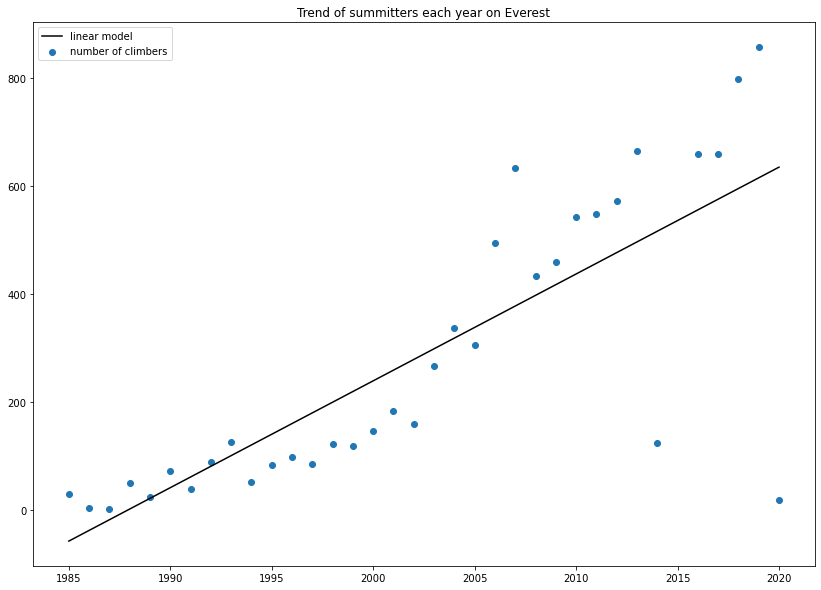

In [4]:
x_train = df['Year'].unique()  #
x_train = x_train.reshape(-1, 1) #required to reshape the array into the correct shape for training the model
groupedDf = df.groupby('Year').count() #groups all columns by year and gives a count of each
y_train = groupedDf['Name'] #gives the number of summitters in each year


regr = sk.LinearRegression()
regr.fit(x_train, y_train)  
N = int(regr.predict(np.array(2023).reshape(1,-1))) #predicts the number of climbers for 2023
print("The number of climbers in 2023 is {}.".format(N))


plt.plot(x_train, regr.predict(x_train),color='k', label='linear model') 
plt.scatter(x_train, y_train, label='number of climbers')
plt.legend()
plt.title('Summitters each year on Everest')

We can create a Data Series containing just the age values. It's then possible to use the describe() method to find out the mean and standard deviation of the ages of summitters.

In [5]:
ages = df.loc[:,'Age']
ages.describe()

count    9840.000000
mean       35.358841
std         9.348445
min        13.000000
25%        28.000000
50%        34.000000
75%        41.000000
max        80.000000
Name: Age, dtype: float64

Plotting a histogram of the age Data Series gives us an idea of the shape of the distribution. This is often the best indicator of what distribution is appropriate when generating synthetic data.

(array([ 149., 1603., 2858., 2179., 1814.,  828.,  296.,   93.,   17.,
           3.]),
 array([13. , 19.7, 26.4, 33.1, 39.8, 46.5, 53.2, 59.9, 66.6, 73.3, 80. ]),
 <BarContainer object of 10 artists>)

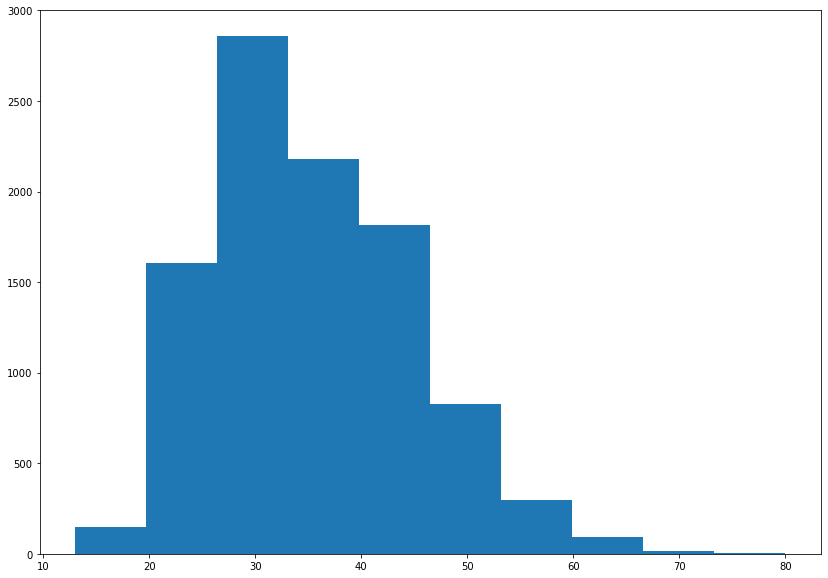

In [6]:
plt.hist(ages, bins=10)

This histogram looks relatively normally distributed, if a little right skewed. We can try generating a dataset using the mean and standard deviation of the ages Data Series using the normal distribution so see if it is a close match.

In [7]:
rng = np.random.default_rng()  #creates random number generator
vals = rng.normal(loc = ages.mean(), scale = ages.std(), size = N)
print(vals)

[31.10711228 43.59933138 46.30057845 40.8399081  36.50955476 33.25239174
 37.33451865 44.43635898 31.52189055 36.40196467 27.06788804 40.85159816
 45.99909328 37.72185861 33.80709608 34.91823662 34.30800387 53.24834461
 37.9417429  18.51709054 36.43324668 34.36388696 25.38938283 25.84254769
 25.47463684 26.06755834 33.78870605 45.73285848 52.61900711 47.61263613
 46.79307344 33.031438   32.18746426 42.33797212 13.39323136 41.50206957
 20.80224045 23.17983221 38.62899854 48.23233864 29.7531505  32.32814599
 43.11890476 20.22056719 26.47598143 30.82507669 20.68548106 22.59695599
 35.64527143 36.11297341 36.96855723 31.28062703 37.66541062 38.63339521
 35.63446873 42.91160091 58.5832968  62.56600592 43.45816189 29.43932793
 40.8044099  29.20870663 31.11738807 48.24094862 39.24937932 10.31257862
 21.61238782 28.89714334 18.001235   29.07367061 28.54357275 18.36022114
 39.18294666 70.56514749 40.09291303 28.19577216 32.55587702 39.14044023
 20.87883264 37.53625997 42.54199226 38.4611552  34

(array([  2.,   8.,  39., 141., 181., 176., 101.,  35.,   8.,   2.]),
 array([ 1.77219773,  8.6514927 , 15.53078768, 22.41008266, 29.28937763,
        36.16867261, 43.04796758, 49.92726256, 56.80655754, 63.68585251,
        70.56514749]),
 <BarContainer object of 10 artists>)

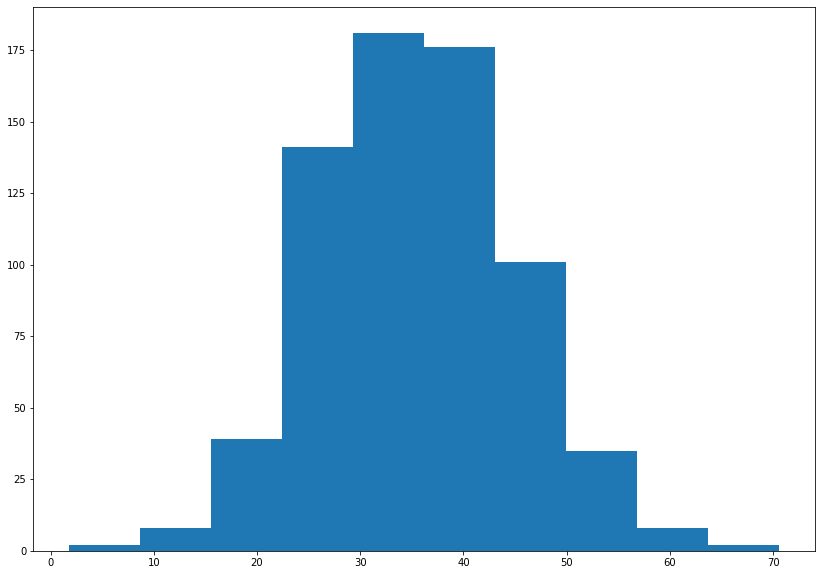

In [8]:
plt.hist(vals, bins=10)

This appears to be a relatively close approximation of the age Data Series so we will use the variable vals to synthesise age data.. 

Next we consider the probability that a summitter climbed without oxygen. We will 

In [10]:
noOxygen = df.loc[df.loc[:,'Oxy'] == 'No']
noOxygen.head()

,Peak,Name,Year,Season,Date,Time,Citizenship,Sex,Age,Oxy,Dth,Host
190,EVER,Noboru Yamada,1985,Aut,30-Oct,10:00,Japan,M,35,No,.,Nepal
191,EVER,"Ang Rita Sherpa (Yilajung, Khumbu)",1985,Spr,29-Apr,09:25,Nepal,M,36,No,.,Nepal
200,EVER,Erhard Loretan,1986,Sum,30-Aug,14:30,Switzerland,M,27,No,.,China
203,EVER,Jean Fernand Troillet,1986,Sum,30-Aug,14:30,Switzerland,M,38,No,.,China
205,EVER,"Ang Rita Sherpa (Yilajung, Khumbu)",1987,Win,22-Dec,14:20,Nepal,M,39,No,.,Nepal


In [26]:
noOxPotential = df.Name.count() #finds the total number of summitters in the original dataset
noOxPotential

9840

We can look at the historical data to get an idea of the probability that a climber will not use oxygen in their attempt. We can count the number of climbers in total who have used oxygen and divide it by the total number of summitters. We can use this probability with the binomial distribution to generate our synthetic data on oxygen use since we are looking at a binary choice determined by probability.

In [12]:
noOxProbability = noOxygen.Age.count() / noOxPotential
noOxProbability

0.019715447154471544

We now calculate use of oxygen synthetic data by generating a dataset with the binomial method in numpy.random. It will return a list of 0 showing oxygen use and 1 showing no oxygen use. Given that the probability of using not oxygen is very low, we expect a list consisting mostly of 0s.

In [13]:
oxUse = []
for a in vals:
    synNoOx = rng.binomial(1, noOxProbability)
    oxUse.append(synNoOx)
print(oxUse)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

In [14]:
print("{} summitters used oxygen and {} climbed without oxygen.".format(oxUse.count(0), oxUse.count(1)))

679 summitters used oxygen and 14 climbed without oxygen.


Next we calculate the probabilities of climbing in each season.

In [15]:
sprCount = df.loc[df.loc[:,'Season'] == 'Spr'].Season.count()
sumCount = df.loc[df.loc[:,'Season'] == 'Sum'].Season.count()
autCount = df.loc[df.loc[:,'Season'] == 'Aut'].Season.count()
winCount = df.loc[df.loc[:,'Season'] == 'Win'].Season.count()

sprProb = sprCount / df.Season.count()
sumProb = sumCount / df.Season.count()
autProb = autCount / df.Season.count()
winProb = winCount / df.Season.count()

seasProbs = [sprProb, sumProb, autProb, winProb]
seasProbs

[0.9761178861788617,
 0.0008130081300813008,
 0.02225609756097561,
 0.0008130081300813008]

Generate a set of seasons chosen by each climber in the synthetic dataset. We can use the choices method from the random package, with the probabilities above as the weights, to determine a synthetic dataset reflective of the general choices of climbers. It will be heavily dominated by spring but should a couple of attempts in the autumn. Summer and winter are unlikely to feature unless the size of the dataset, N, is quite large.

In [16]:
seas = ['Spr', 'Sum', 'Aut', 'Win']
seasList = []

for i in range(0, N):
    seasChoice = random.choices(seas, weights=seasProbs)
    seasList.append(seasChoice[0])

print(seasList)

['Spr', 'Spr', 'Spr', 'Aut', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr'

In [24]:
print("There were {} summits in spring, {} summit(s) in summer, {} summits in autumn and {} summit(s) in winter."\
      .format(seasList.count('Spr'), seasList.count('Sum'), seasList.count('Aut'), seasList.count('Win')))

There were 675 summits in spring, 1 summit(s) in summer, 16 summits in autumn and 1 summit(s) in winter.


Calculate the probabilities of surviving for summitting in each season with and without oxygen. Again we will use these probabilities with the binomial distribution as we are considering a binary choice, either surviving or not.

In [18]:
for i in seas:
    NoOxDeathProb = round(df[(df['Season'] == i) & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                           / df[(df['Season'] == i) & (df['Oxy'] == 'No')].Season.count(),2)
    print('The historical probability of death after summitting when climbing without oxygen in {} is {}'.format(i,NoOxDeathProb))
    OxDeathProb = round(df[(df['Season'] == i) & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                           / df[(df['Season'] == i) & (df['Oxy'] == 'Y')].Season.count(),2)
    print('The historical probability of death after summitting when climbing with oxygen in {} is {}'.format(i,OxDeathProb))


The historical probability of death after summitting when climbing without oxygen in Spr is 0.05
The historical probability of death after summitting when climbing with oxygen in Spr is 0.01
The historical probability of death after summitting when climbing without oxygen in Sum is 0.0
The historical probability of death after summitting when climbing with oxygen in Sum is 0.0
The historical probability of death after summitting when climbing without oxygen in Aut is 0.06
The historical probability of death after summitting when climbing with oxygen in Aut is 0.01
The historical probability of death after summitting when climbing without oxygen in Win is 0.0
The historical probability of death after summitting when climbing with oxygen in Win is 0.0


We can now define a function that will merge the climber number, ages, season and oxygen use into a list and add a death or survival based on the probabilities determined by season and oxygen use. 

In [19]:
synEverestData = []

def everestFunction():
    for i in range(0, N):
        data = []
        if oxUse[i] == 0 and seasList[i] == 'Spr':
            death = rng.binomial(1, df[(df['Season'] == 'Spr') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Spr') & (df['Oxy'] == 'No')].Season.count())

        elif oxUse[i] == 1 and seasList[i] == 'Spr':
            death = rng.binomial(1, df[(df['Season'] == 'Spr') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Spr') & (df['Oxy'] == 'Y')].Season.count())

        elif oxUse[i] == 0 and seasList[i] == 'Sum':
            death = rng.binomial(1, df[(df['Season'] == 'Sum') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Sum') & (df['Oxy'] == 'No')].Season.count())

        elif oxUse[i] == 1 and seasList[i] == 'Sum':
            death = rng.binomial(1, df[(df['Season'] == 'Sum') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Sum') & (df['Oxy'] == 'Y')].Season.count())

        elif oxUse[i] == 0 and seasList[i] == 'Aut':
            death = rng.binomial(1, df[(df['Season'] == 'Aut') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Aut') & (df['Oxy'] == 'No')].Season.count())

        elif oxUse[i] == 1 and seasList[i] == 'Aut':
            death = rng.binomial(1, df[(df['Season'] == 'Aut') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Aut') & (df['Oxy'] == 'Y')].Season.count())

        elif oxUse[i] == 0 and seasList[i] == 'Win':
            death = rng.binomial(1, df[(df['Season'] == 'Win') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Win') & (df['Oxy'] == 'No')].Season.count())

        elif oxUse[i] == 1 and seasList[i] == 'Win':
            death = rng.binomial(1, df[(df['Season'] == 'Win') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Win') & (df['Oxy'] == 'Y')].Season.count())
        
        #this block of code changes the 0s and 1s of the Oxy and Survived columns to strings that are more descriptive, similar to the original dataset
        if oxUse[i] == 1:
            oxUse2 = 'No'
        else:
            oxUse2 = 'Yes'

        if death == 0:
            death2 = 'Survived'
        else:
            death2 = 'Died'

        #this block populates a list with lists containing the synthetic dataset. The final line converts this list of lists to a dataframe.
        data = [i, round(vals[i],0), oxUse2, seasList[i], death2]
        synEverestData.append(data)
        synEverestDataDf = pd.DataFrame(synEverestData, columns=['Climber', 'Age', 'Oxygen', 'Season', 'Survived'])
        
    return synEverestDataDf
        

everestFunction()



,Climber,Age,Oxygen,Season,Survived
0,0,31.0,Yes,Spr,Survived
1,1,44.0,Yes,Spr,Survived
2,2,46.0,Yes,Spr,Survived
3,3,41.0,Yes,Aut,Survived
4,4,37.0,Yes,Spr,Survived
...,...,...,...,...,...
688,688,29.0,Yes,Spr,Survived
689,689,35.0,Yes,Spr,Survived
690,690,17.0,Yes,Spr,Survived
691,691,41.0,Yes,Spr,Survived


The number of deaths in this synthetic dataset can be measured against the historicial death rate.

In [21]:
numberOfDeaths = synEverestDataDf[synEverestDataDf['Survived'] == 'Died'].Survived.count()
numberOfDeaths

32

The historical death rate is calculated by:

In [22]:
historicalDeathRate = round(df[df['Dth'] == 'Y'].Dth.count() / df.Dth.count(), 3)
historicalDeathRate

0.008

Our dataset death rate is calculated by:

In [23]:
predictDeathRate = round(synEverestDataDf[(synEverestDataDf['Survived'] == 'Died')].Survived.count() / synEverestDataDf.Survived.count(),3)
print(predictDeathRate)

0.046
